# Total Adjusted Carbon Offset by State  
This plot shows the potential total carbon offset of each state if the potential roofs had solar panels. It's created with the base data found within Google's Project Sunroof dataset and modified to account for how much each state already uses carbon free energy sources. As an example, if 50% of California's energy already came from carbon free sources than their potential carbon offset isn't 6.71e+07 metric tons, as stated in the dataset. The data what percent of power is produced by carbon free sources comes from the EPA. Currently these plots assume that carbon based power sources emit the same amount of CO2 per BTU, which is not true. With more time, these factors will be taken into account.  
  
As this is the first file using adjusted carbon offset, the work will be shown here and saved as a new csv file for ease of use in further plots.

In [1]:
#Import Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
#Import project sunroof data into pandas from CSV.
sunroof_state = '../Resources/ProjectSunroofClean/project-sunroof-state-clean.csv'
sunroof_state_df = pd.read_csv(sunroof_state)

#sunroof_state_df.head()

In [3]:
#Import power source data into pandas from CSV.
power_source = '../Resources/OtherData/power_sources_by_state.csv'
power_source_df = pd.read_csv(power_source)

#power_source_df.head()

In [4]:
#Reindex sunroof_state_df to just be state name and carbon offset.
sunroof_state_trimmed_df = sunroof_state_df.reindex(columns = ['state_name', 'carbon_offset_metric_tons'])
sunroof_state_trimmed_df = sunroof_state_trimmed_df.rename(columns = {'state_name': 'state', 'carbon_offset_metric_tons': 'total_carbon_offset_metric_tons'})
#sunroof_state_trimmed_df.head()

In [5]:
#Reindex power_source_df to just be state name and Carbon sources. Also divide Carbon Sources by 100 to get the percent value.
power_source_trimmed_df = power_source_df.reindex(columns = ['State', 'Carbon Sources'])
power_source_trimmed_df = power_source_trimmed_df.rename(columns = {'State': 'state', 'Carbon Sources': 'percent_carbon_sources'})
power_source_trimmed_df['percent_carbon_sources'] = power_source_trimmed_df['percent_carbon_sources']/100
#power_source_trimmed_df.head()

In [6]:
#Join the dataframes
adjusted_carbon_offset_working_df = sunroof_state_trimmed_df.join(power_source_trimmed_df.set_index('state'), on = "state")
#adjusted_carbon_offset_working_df = adjusted_carbon_offset_working_df.set_index('state')
adjusted_carbon_offset_working_df.head()


,state,total_carbon_offset_metric_tons,percent_carbon_sources
0,Alabama,1.580000e+07,0.668
1,Alaska,4.499588e+05,0.711
2,Arizona,2.540000e+07,0.596
3,Arkansas,7.162306e+06,0.718
4,California,6.710000e+07,0.535


In [7]:
#Multiply carbon offset and carbon sources to get the adujsted carbon offset, and save as a CSV file.
adjusted_carbon_offset_working_df['adjusted_carbon_offset_metric_tons'] = (adjusted_carbon_offset_working_df['total_carbon_offset_metric_tons'] 
                                                                           * adjusted_carbon_offset_working_df['percent_carbon_sources'])
adjusted_carbon_offset_working_df['renewable_energy_sources'] = (adjusted_carbon_offset_working_df['total_carbon_offset_metric_tons'] 
                                                                 - adjusted_carbon_offset_working_df['adjusted_carbon_offset_metric_tons'])

adjusted_carbon_offset_df = adjusted_carbon_offset_working_df
adjusted_carbon_offset_df.head()

#Save to csv file.
#adjusted_carbon_offset_df.to_csv('../Resources/OtherData/adjusted_carbon_offset.csv')

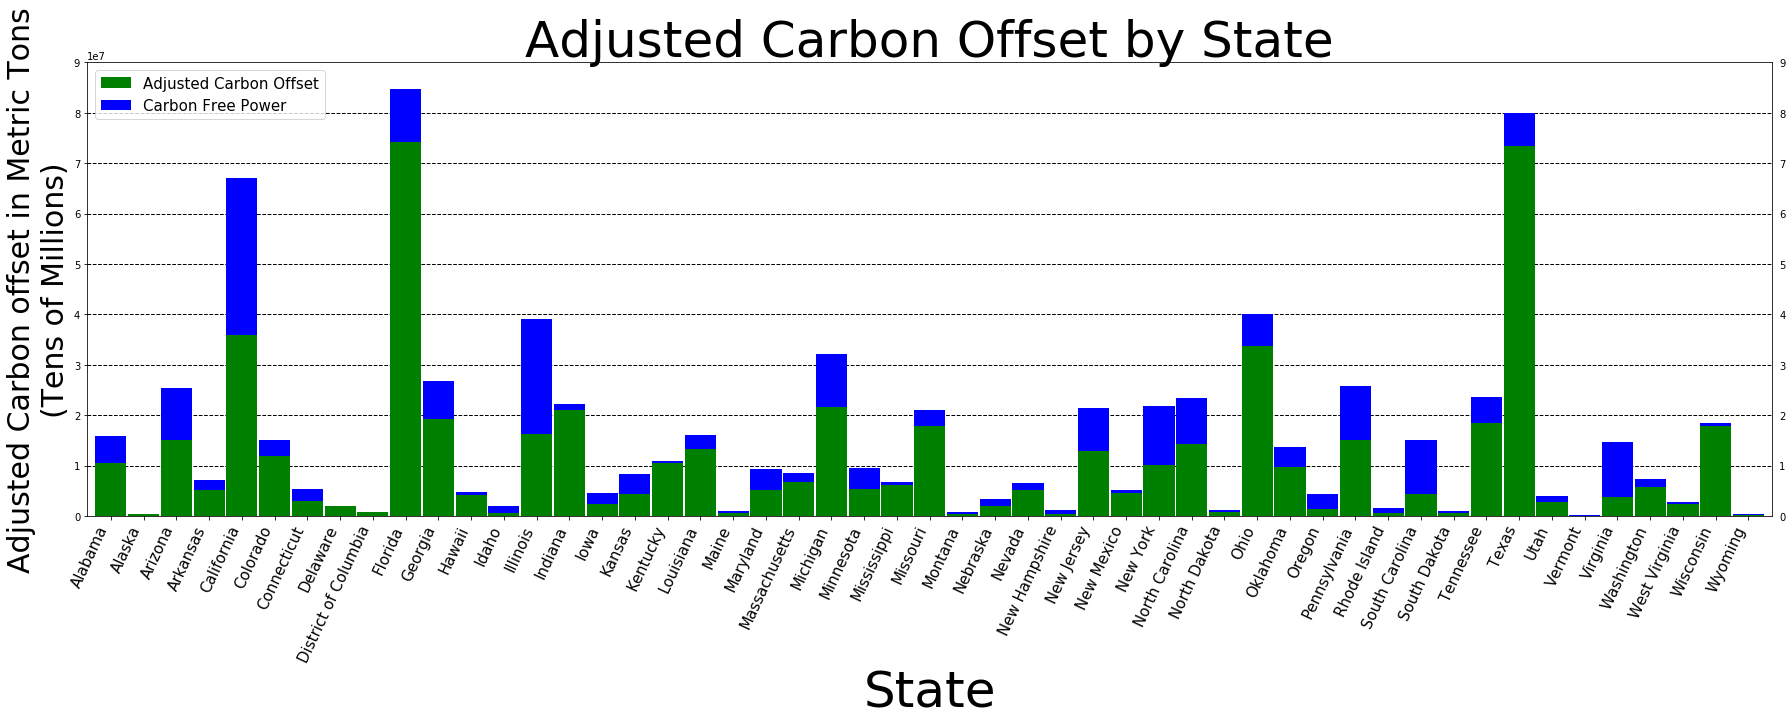

In [8]:
# Bar Chart of Adjusted Carbon Offset, and save as a png file.

#plot the data
adjusted_carbon_offset_df.plot.bar(x = 'state', y = (['adjusted_carbon_offset_metric_tons', 'renewable_energy_sources']), 
                                   figsize = (25, 10), stacked = True, color= ("green", "blue"), width = 0.95)
#Titles
plt.title('Adjusted Carbon Offset by State', fontsize=50)
plt.xlabel('State', fontsize = 50)
plt.ylabel('Adjusted Carbon offset in Metric Tons'
          '\n'
          '(Tens of Millions)', fontsize = 30)
#xticks
plt.xticks(rotation=65, ha='right', fontsize=15)

#Legend
plt.legend(('Adjusted Carbon Offset', 'Carbon Free Power'), fontsize=15, loc='upper left')

#Horizontal Lines
increment = 10000000
line = list(range(1,9))
a=0
for i in line:
    plt.axhline(line[a]*increment, ls='--', color='black', lw='1', zorder=0)
    a+=1
    
# Y-axis ticks
plt.tick_params(labelright=True)
plt.ylim(0,90000000)
    

#Save figure
plt.tight_layout()
#plt.savefig('../Images/Adjusted_Carbon_Offset_by_State.png')

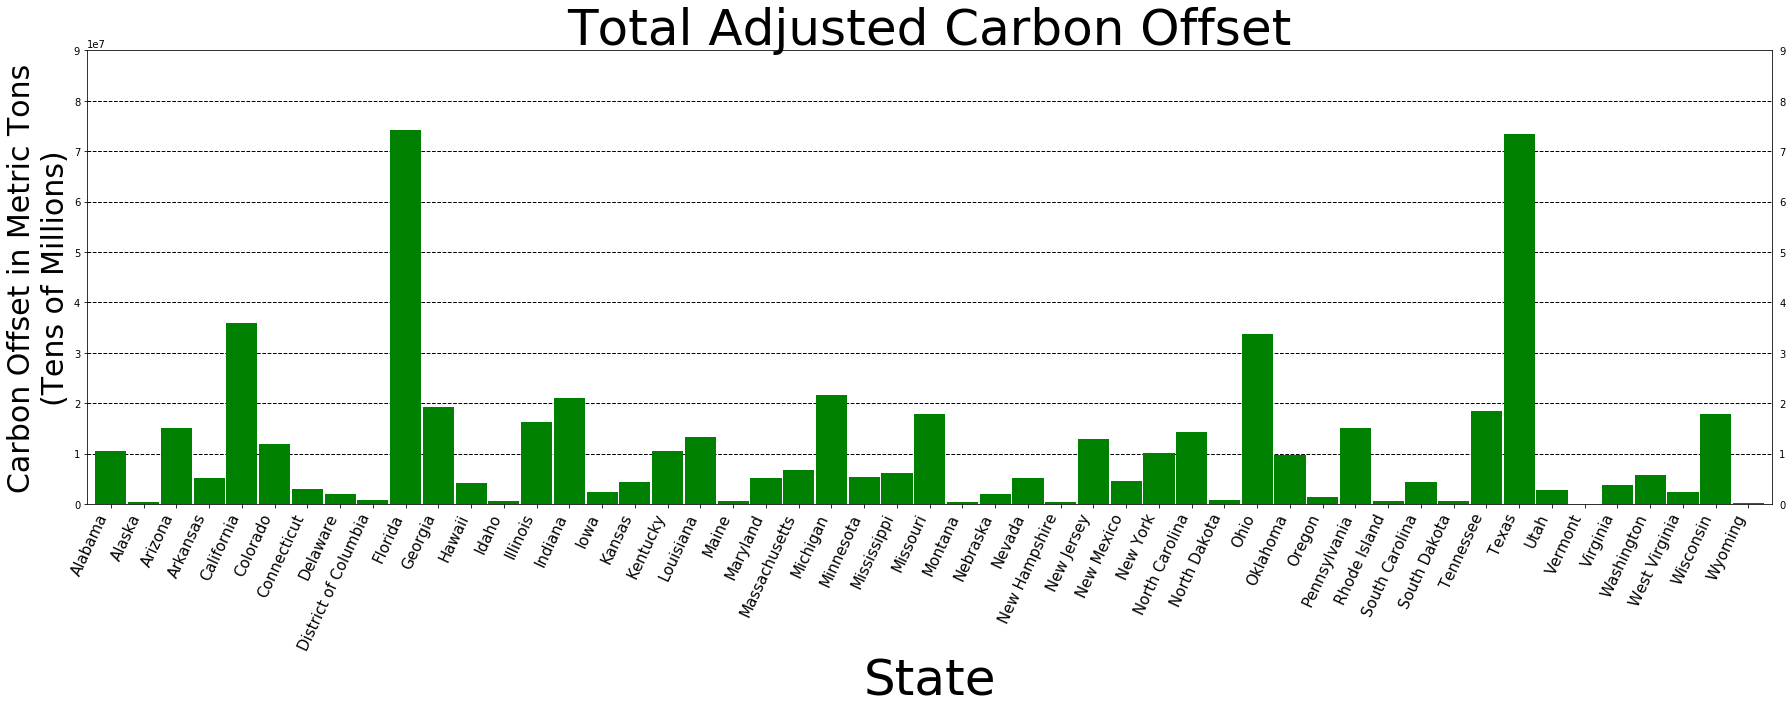

In [9]:
#Bar Chart of Total Adjusted Carbon Offset by State

#Plot the data
adjusted_carbon_offset_df.plot.bar(x='state', y='adjusted_carbon_offset_metric_tons', figsize=(25,10), color='green', 
                                   width=0.95, legend = False)

#Titles
plt.title('Total Adjusted Carbon Offset', fontsize=50)
plt.xlabel('State', fontsize=50)
plt.ylabel('Carbon Offset in Metric Tons'
          '\n'
          '(Tens of Millions)', fontsize=30)

#Xticks
plt.xticks(rotation=65, ha='right', fontsize=15)

#Horizontal lines
increment = 10000000
line = list(range(1,9))
a = 0
for i in line:
    plt.axhline(line[a]*increment, ls='--', color = 'black', lw='1', zorder=0)
    a+=1
    
#Y-Axis ticks
plt.tick_params(labelright=True)
plt.ylim(0,90000000)

#Save Figure
plt.tight_layout()
#plt.savefig('../Images/total_adjusted_carbon_offset_by_state.png')